

---


# **Firing statistics of the leaky integrate-and-fire neuron**



---

####*Learning outcomes*

1. Implement and simulate a **leaky integrate and fire neuron (LIF)**
2. Understand the relationship between input current and firing rate through the **f-I** curve.
3. Numerically investigate the link between **noise regime** and **interspike interval distribution**
4. Understand the link between the **Fano factor** and **Poisson processes**
5. Understand how **Poisson processes** can be used to model **spiking**


# Introduction

Neurons represent and transmit information by firing sequences of spikes in response to the inputs they receive. Understanding how the patterns of these spikes depend on the statistics of the input is therefore important for understanding how neurons process information. Highly detailed neuron models, such as the Hudgkin-Huxley model, can explain very well the biophysical mechanism of how the action potentials are generated but they can also be computationally expensive and generally difficult to work with. When studying neural spiking activity and its relation to the input that evoked it, most of the biophysical details can be ignored and the action potential sequence can be characterised simply as a list of times when spikes occurred. This abstraction greatly simplifies neuron models, making them more tractable and allowing to focus on the variables of interest (e.g. the spike patterns).

Since the sequence of spikes generated by a given stimulus varies from trial to trial, neuronal responses are typically treated statistically. For example, they may be characterised by *interspike intervals* distributions or *firing rates*, rather than as specific spike sequences. A key feature of neural activity is how this spike frequency *f* changes in response to different synaptic input currents *I* that the neuron receives, and this is described by the *f-I curve*. This function summarises important characteristics of the (*mean*) spiking activity of a neuron and it can be useful as grounds of comparison between neural models and experimental data. To characterise the *stochastic* properties of spiking activity (e.g. how variable spikes are), a useful statistic often used in neuroscience is the *Fano factor*, which measures the variance of a counting process (e.g. spike counts) relative to its mean. Taken together, these quantities characterise the mean and variance of neural activity patterns and allow us to quantify how they change in response to different (or noisy) inputs, which is the basis of neural coding and how neurons trasmit information.

<p align="center" width="100%">
<img src="https://drive.google.com/uc?id=1pJ4JefqDRTcrRsifSwh5wUFgkhQEd29n"
width="500px;">
</p>

*Figure 1: Neural spiking patterns in response to different stimuli and to repetitions of the same stimulus. Exploring how these responses vary in relation to the given input is a key question. To do so, it's useful to define certain quantities of the spike sequences (e.g. interspike intervals, firing rates and spike count variability) and study how they change with changes of the input.*

In this lab, we will look at one of the simpler neural models, *the leaky integrate and fire neuron* (discussed in Lectures 5 and 6), and characterise its spiking response. This model only considers the passive membrane dynamics, i.e. variations of the potential in response to external currents when membrane conductances are constant, and does not model the biophysics of the action potential. Instead, when the membrane potential reaches the spike threshold the spike is approximated as an instantaneous event and the potential is 'manually' reset to its resting value. You will see how the spike statistics and membrane potential dynamics of the model depend on the statistics of the input the neuron receives, and how analytical approximations can be made to understand this behaviour in limiting situations.

<p align="center" width="100%">
<img src="https://drive.google.com/uc?id=1t7tqk4423YzcYxnZhFG0mWPQ3Cl8Y7ZN"
width="500px;">
</p>

*Figure 2: The LIF neuron model approximates spikes as an idealised event in time when the membrane potential reaches a certain threshold. This makes the model more tractable and well suited to study the properties of the neural activity (e.g. interspike intervals, f-I curve...) in response to different levels of synaptic input currents. In this example, the exponential model of synapses is used.*

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# global defaults for plots - optional
sns.set_theme(style="ticks",
              palette="Set2",
              font_scale=1.7,
              rc={
              "axes.spines.right": False,
              "axes.spines.top": False,
          },
          )

## Exercise 1.1 The leaky integrate and fire neuron

In Lab 1 we simulated the passive membrane dynamics of a neuron:

$$ \tau \frac{\mathrm{d}V}{\mathrm{d}t} = -(V-E_m) + \frac{I_{ext}}{g_m} $$

The leaky integrate and fire model obeys the above equation while below spiking threshold. Now, we will add spikes to the model. To do so, we add the following spike-reset rule: if $V (t) \geq V_{threshold}$ then we immediately set $V (t) \to V_{reset}$.

* Modify the code for the passive dynamics in Lab 1 to incorporate this spike-reset rule. To do this, you can add an if-then statement inside your loop over time steps. You will also need to store spike times for later use. Using this code, set $V_{threshold} = −50$ mV, $V_{reset} = −75$ mV and try running the simulation with different values of input current and time constant and plot the membrane potential in each case.

How does each parameter influence the spiking activity?


In [4]:
def spiking_LIF_vectorized(N_t, dt,  V_init, E_m, Theta, V_reset, I_ext, g_m, tau):
    #I_ext is a vector
    #V_init is a vector
    #tau is a vector


    n_neurons = V_init.shape[0]
    V = np.zeros([N_t+1, n_neurons])

    V[0,:] = V_init[:]
    spikes = np.zeros(V.shape)
    # print(spikes)
    ### your solution here
    for t in range(1,N_t+1):
        dV = (-(V[t-1] - E_m) + I_ext/g_m)
        V[t] = V[t-1] + dt * dV / tau
        # print(v)
        #check spike and reset
        spiked = (V[t] >= Theta)
        V[t] = V_reset * spiked + V[t] * (spiked == 0)
        spikes[t] = spiked * 1.0
    spike_times = []
    for n in range(n_neurons):
        if np.any(spikes[:,n] == 1.0):
            spike_times.append(np.nonzero(spikes[:,n]))
        else:
            spike_times.append(np.array([None]))

    return V, spikes, spike_times

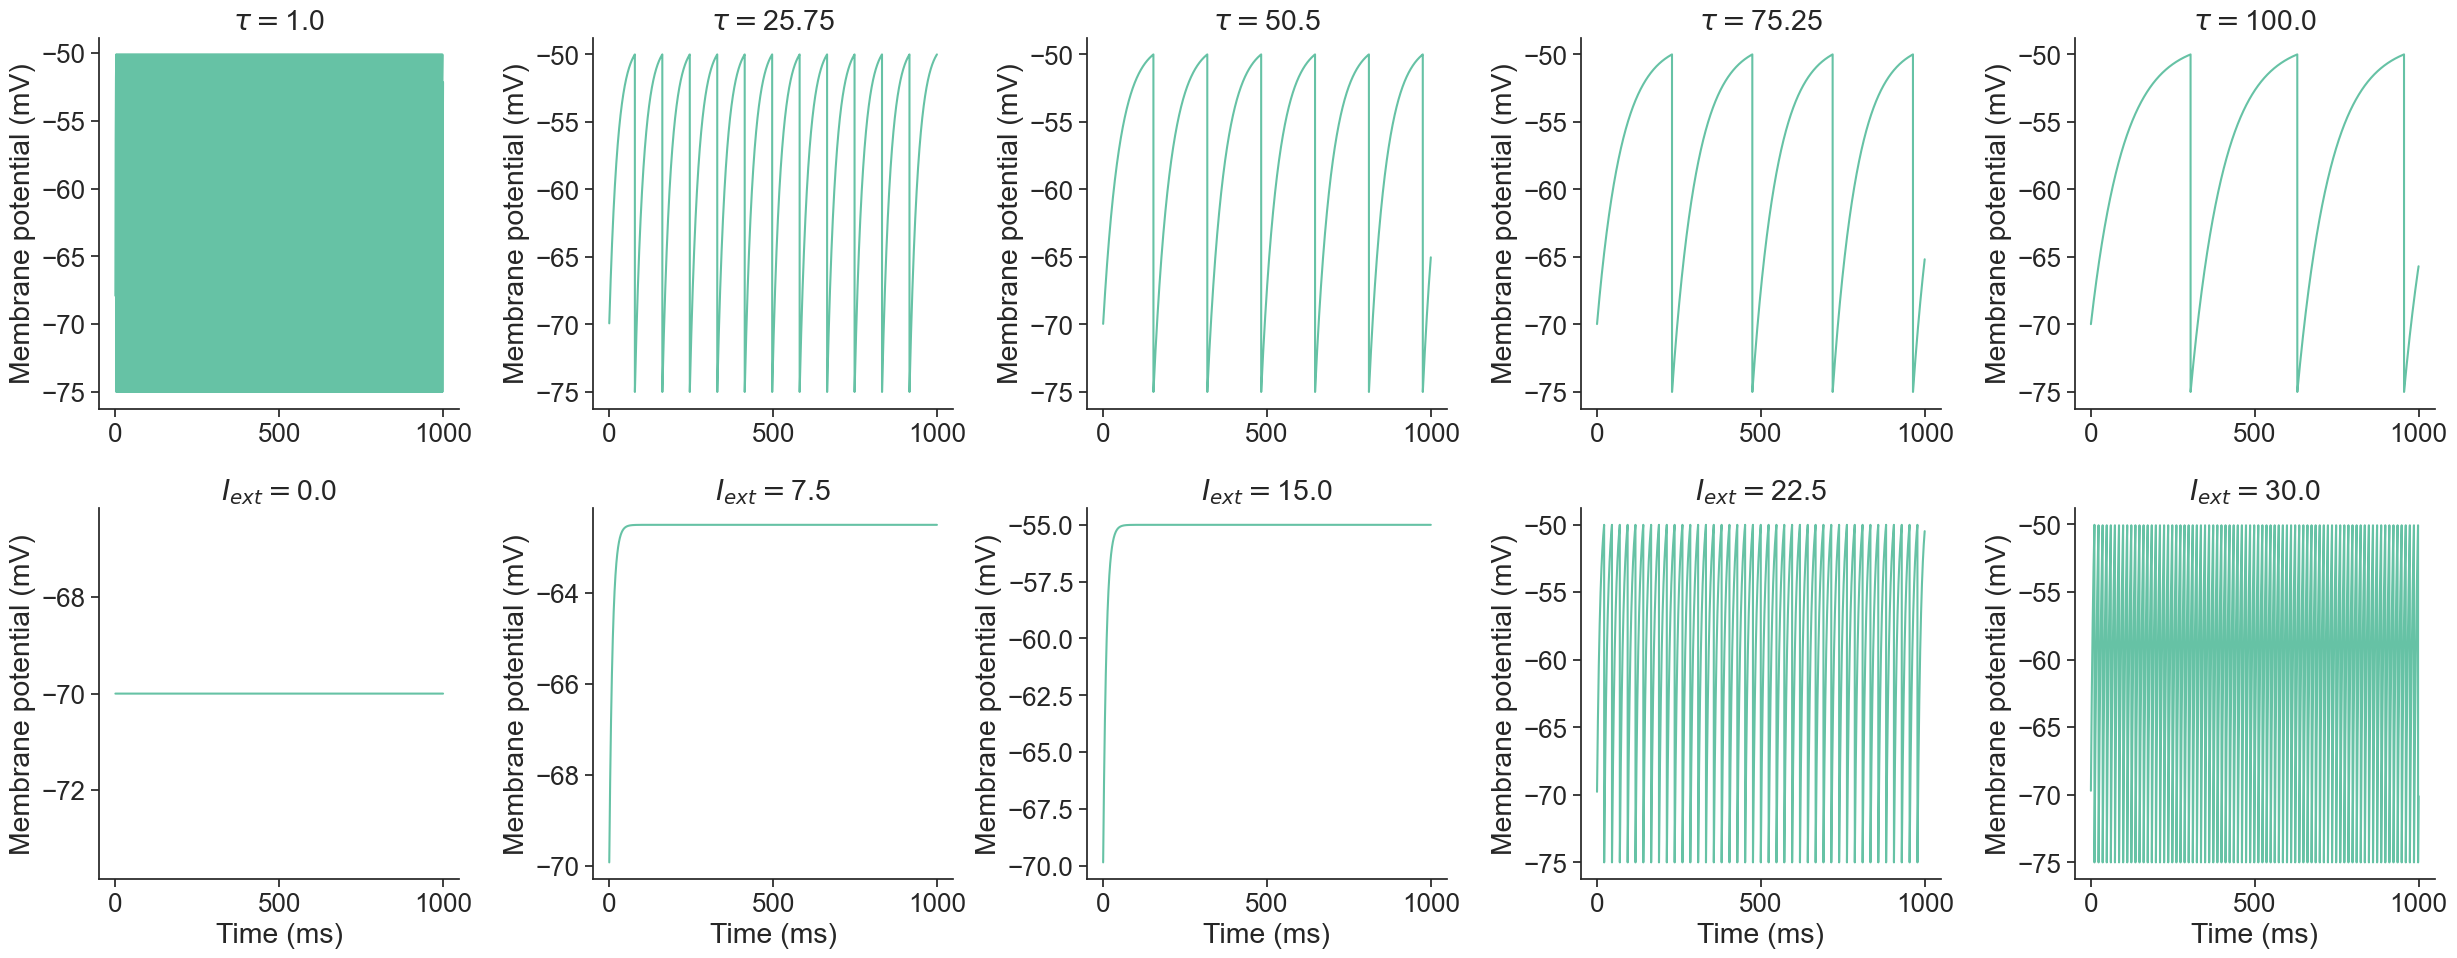

In [5]:
#parameters

#for Euler method
N_t = 10000
dt = 0.1

#for neuron
V_init =-70
E_m = -70
tau = 10
g_m = 1
I_ext = 20

V_theta = -50
V_reset = -75

n_params = 2
values = 5
combs = n_params * values

V_inits = np.zeros([combs])
V_inits[:] = -70
taus = np.zeros([combs]) + 10
taus[:values] =  np.linspace(1,100, values)
I_exts = np.zeros([10]) + 21
I_exts[values:] = np.linspace(0,30,5)

V_spike, spikes , spikes_t = (spiking_LIF_vectorized(N_t, dt, V_inits, E_m, V_theta, V_reset, I_exts, g_m, taus))

fig, ax = plt.subplots(n_params,values, figsize = (25,10))
for i in range(values):
    ax[0,i].plot(np.arange(0,N_t*dt, dt),V_spike[1:,i])
    ax[0,i].set_title('$\\tau =$'+str(taus[i]))
    ax[1,i].plot(np.arange(0,N_t*dt, dt),V_spike[1:,i+values])
    ax[1,i].set_title('$I_{ext} =$'+str(I_exts[i+values]))
    ax[0,i].ticklabel_format(useOffset=False, style = 'plain')
    ax[1,i].ticklabel_format(useOffset=False, style = 'plain')
    ax[0,i].set_ylabel('Membrane potential (mV)')
    ax[1,i].set_ylabel('Membrane potential (mV)')
    ax[1,i].set_xlabel('Time (ms)')

fig.tight_layout()
plt.show()

Answers:

**As tau increases, the frequency of spikes decreases, while peak membrane potential remain constant (because we reset it).**

**As I_ext increases, the membrane potential first slowly reaches the threshold and after 15mA begins to reset and spike frequency further increases**

## Exercise 1.2 Interspike intervals and f-I curve

For each choice of parameters, compute the interspike intervals from the stored spike times (if any). Plot the interspike interval against input current. Now do the same for the spike rate. Review the analytical expression for the f-I curve derived in lecture 5 - do your simulations agree? (you can compare the numerical and analytical results both qualitatively and quantitatively)

In [6]:
def compute_ISI(spike_times, dt = 0.1):

    ISI = []
    neurons = len(spike_times)
    for i in range(neurons):
        # print(spike_times[i])
        ### check if there are spike times (and check if there has been
        ### more than 1 spike) to compute ISI and append
        if np.any(spike_times[i]):
          if len(spike_times[i][0]) > 1:
             ISI.append(np.diff(spike_times[i][0]*dt))
        else:
          ISI.append(np.array([None]))
    return ISI

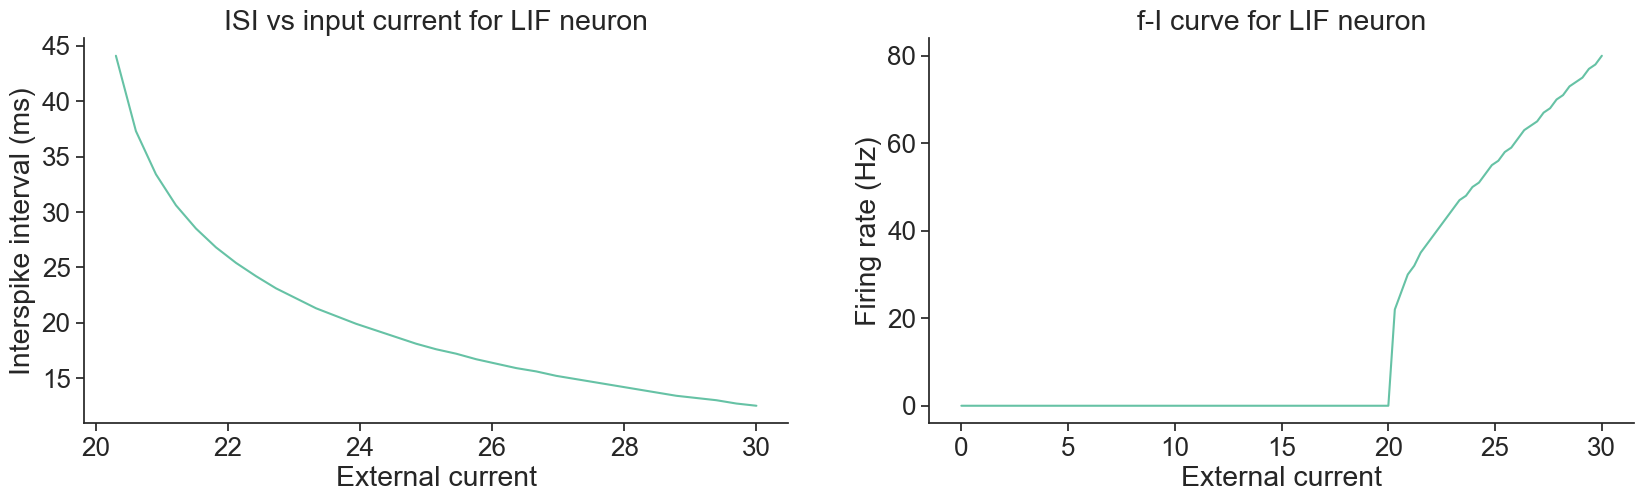

In [7]:
n_param = 1
n_values = 100
combs = n_param * n_values # how many combinations we will test; here: 100 values per parameter
V_inits = np.zeros([combs])
V_inits[:] = -70
taus = np.zeros([combs])
taus[:] = 10
I_exts = np.zeros([combs])
# 0-30 evenly (linearly)
I_exts[:] = np.linspace(0,30,n_values)

V_spike, spikes, spikes_t = (spiking_LIF_vectorized(N_t, dt, V_inits, E_m, V_theta, V_reset, I_exts, g_m, taus))

ISI_raw = compute_ISI(spikes_t)
rate = np.zeros([combs])
ISI_filtered = np.zeros([combs])

#compute mean ISI
for n in range(combs):
    ISI_filtered[n] = ISI_raw[n][0] #all ISI for one parameter setting have the same value, therefore we take the first
    ### Compute the firing rate from the ISI
    rate[n] = np.sum(spikes[:,n]/(N_t*dt/1000))


fig, ax = plt.subplots(1,2, figsize = (20,5))
ax[0].plot( I_exts, ISI_filtered)
ax[0].set_ylabel('Interspike interval (ms)')
ax[0].set_title('ISI vs input current for LIF neuron')
ax[0].set_xlabel('External current')
ax[1].plot(I_exts, rate)
ax[1].set_ylabel('Firing rate (Hz)')
ax[1].set_xlabel('External current')
ax[1].set_title('f-I curve for LIF neuron')
plt.show()

# Adding Noise to the Input

We now consider what happens when the neuron is driven by noisy, fluctuating input. We will initially return to the case of purely passive dynamics, as in Lab 1. You can modify your spiking code to do this is by setting $V_{threshold} = \mathrm{Inf}$, which will ensure that the neuron never spikes.
As discussed in Lecture 6, we will model the noisy input as $I_{ext}(t) = \mu_I + \sigma_I \eta(t)$, where $\mu_I$ is a constant mean input and $\eta(t)$ is Gaussian white noise.

## Exercise 2.1 - Noisy Input

Simulate the passive dynamics with noisy input with $\sigma_I = 15$ and different values of $\mu_I$. Plot the membrane potential for each input current value. Based on these plots, how would you expect this noise to influence spiking?

Note: The magnitude of noise depends on the simulation timestep $dt$. The suggested value of $\sigma_I = 15$ assumes a timestep of $dt = 1 ms$, but if changing $dt$ or units of time (e.g. $dt=0.001s$), we would have to rescale $\sigma_I$. This can be corrected for by setting $I_{ext} = \mu_I + \sqrt{\frac{\tau_m}{dt}} \sigma_I \eta(t)$. However, for the purposes of this lab it is fine just to stick with a fixed time step and choice of units.

In [8]:
def noisy_spiking_LIF(N_t, dt,  V_init, E_m, Theta, V_reset, tau, mu_I, sigma_I, rng = 5):

    n_neurons = mu_I.shape[0]
    V = np.zeros([N_t+1, n_neurons])

    #ensures that multiple runs of the function will result in the same draw of random numbers
    rn_seed = np.random.RandomState(seed = rng)

    V[0,:] = V_init
    spikes = np.zeros(V.shape)

    for t in range(1,N_t+1):
        dV = -(V[t-1] - E_m)
        ### Implement the input current
        I = mu_I + sigma_I * rn_seed.randn(n_neurons)
        V[t] = V[t-1] + 1/tau * dt * (dV + I)
        #check spike and reset
        spiked = (V[t]>= Theta)
        V[t] = V_reset * spiked + V[t] * (spiked == 0.0)
        spikes[t] = spiked * 1.0

    spike_times = []
    for n in range(n_neurons):
        if np.any(spikes[:,n] == 1.0):
            spike_times.append(np.nonzero(spikes[:, n]))
        else:
            spike_times.append(np.array([None]))

    return V, spikes, spike_times

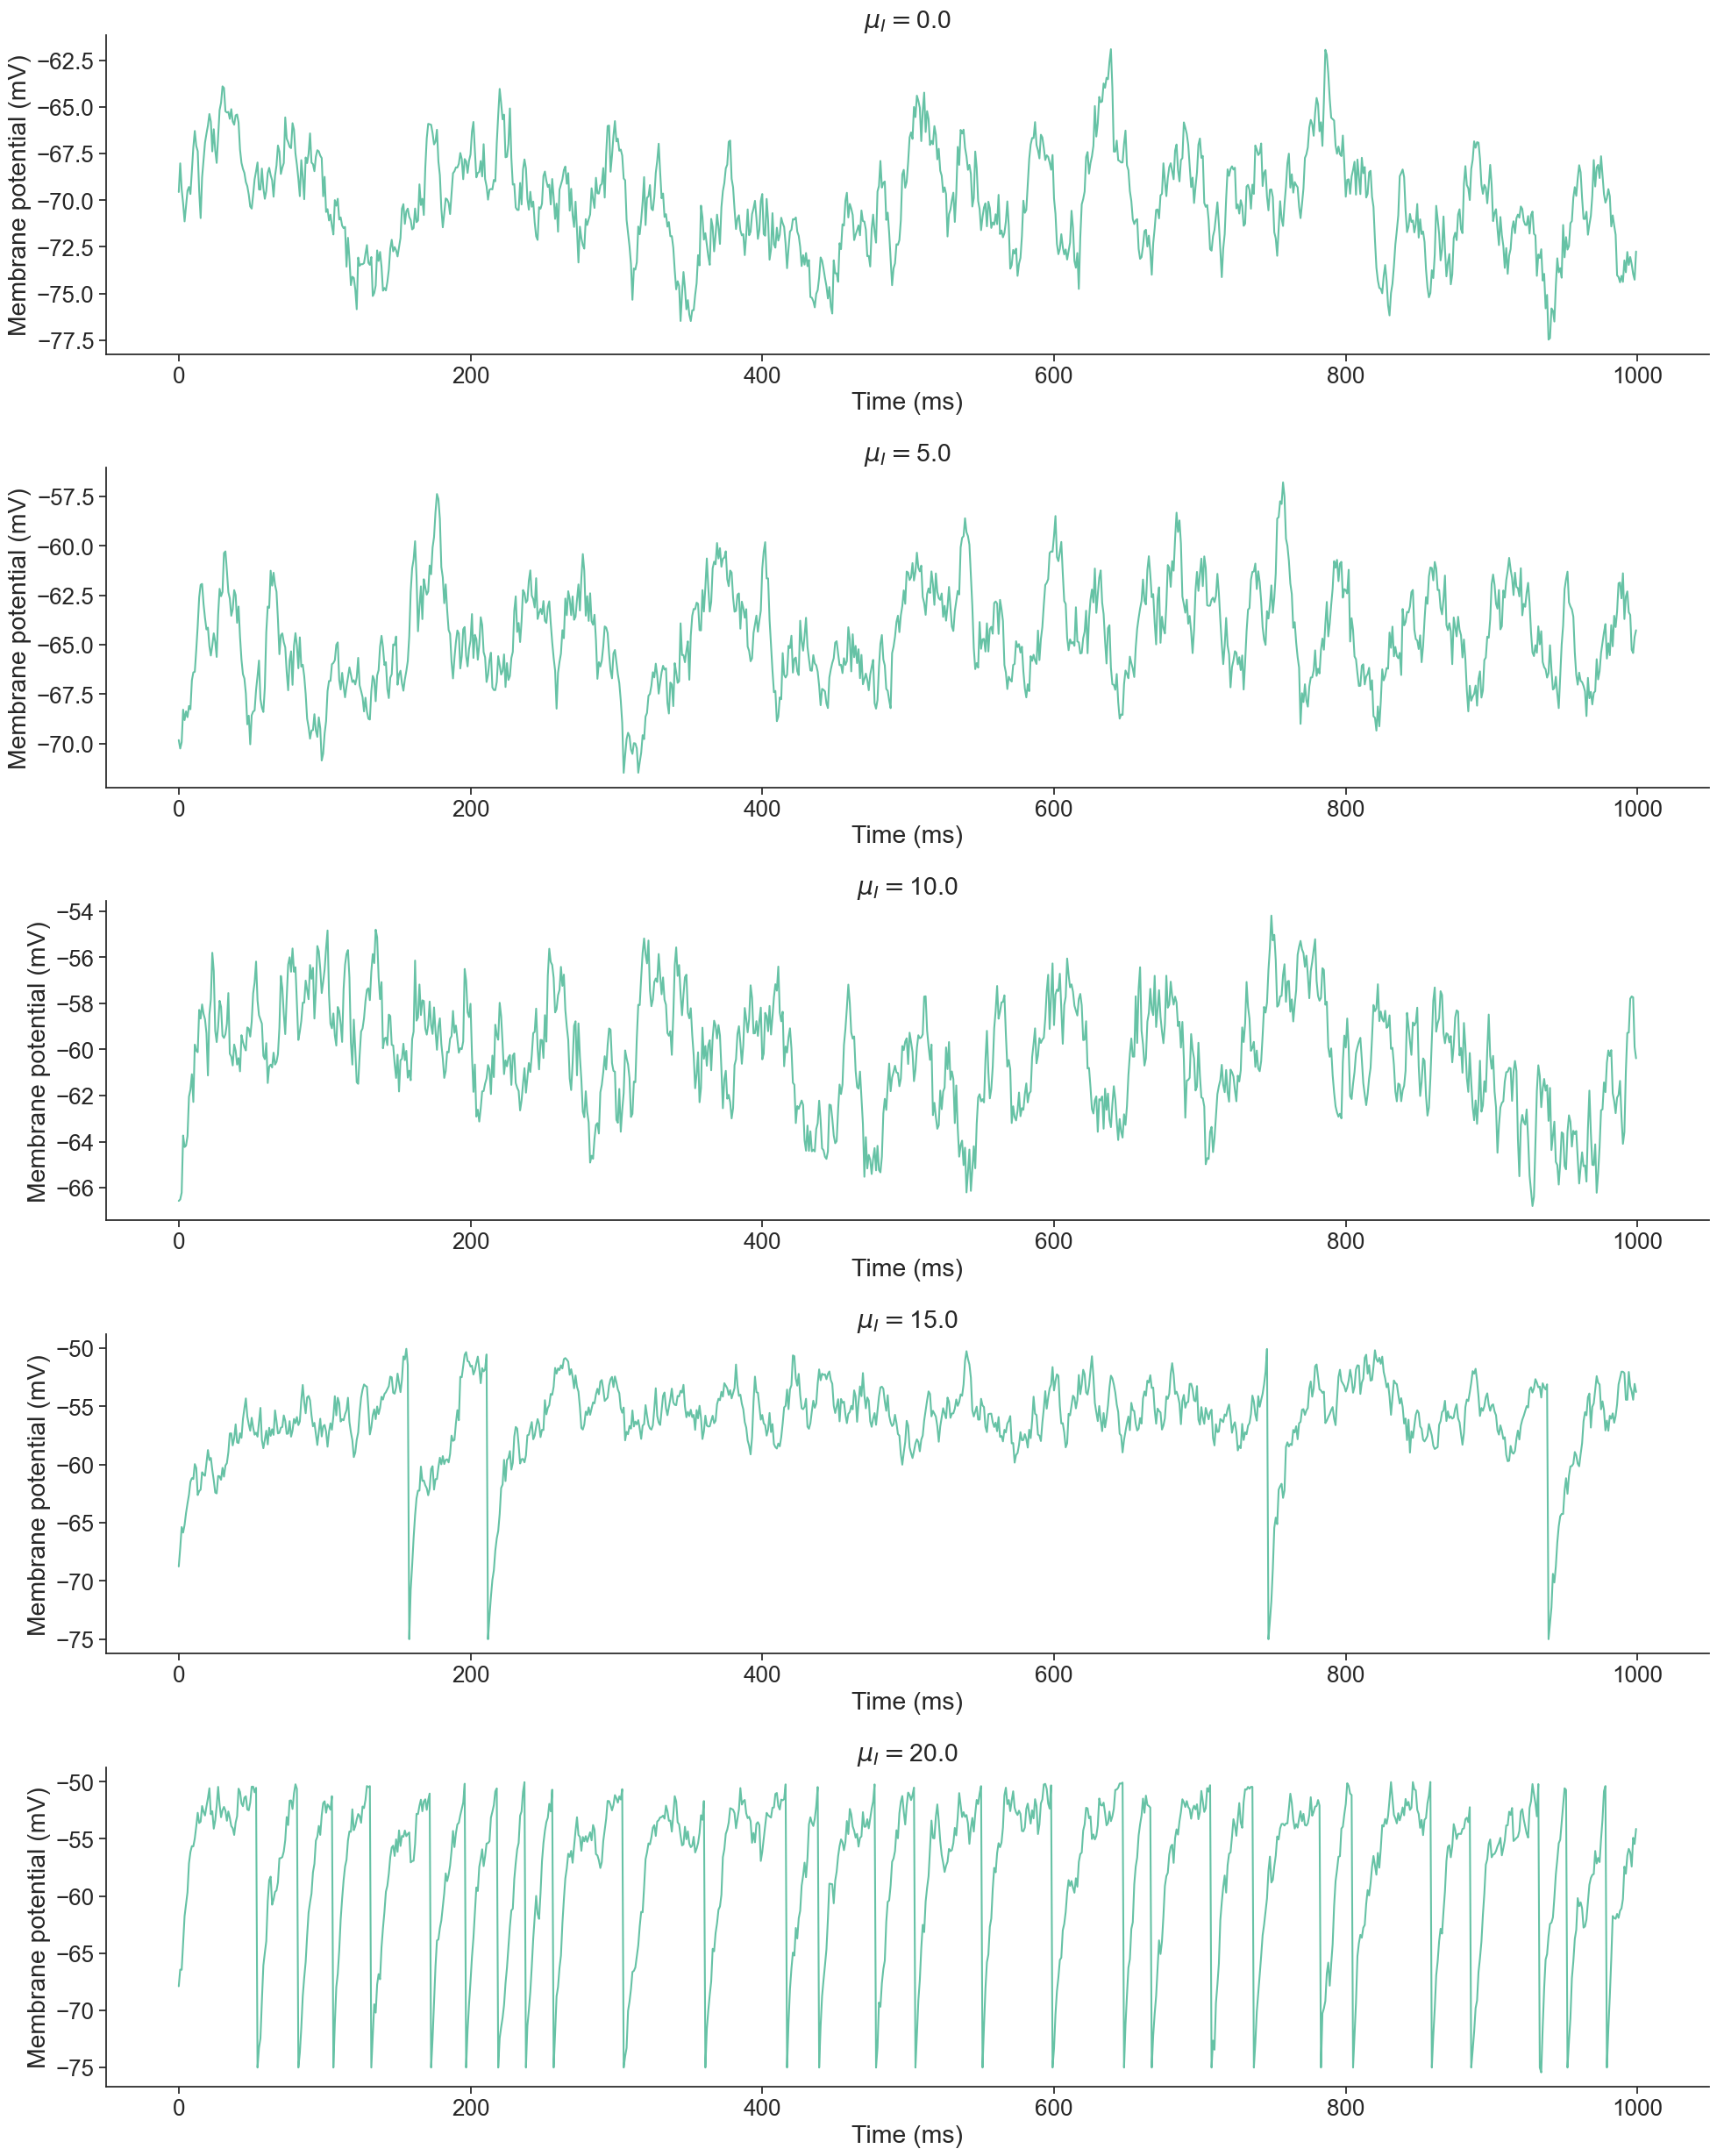

In [9]:
#parameters

#for Euler method
N_t = 1000
dt = 1

#for neuron
V_init =-70
E_m = -70
tau = 10
V_reset = -75
### Set the spiking threshold
V_theta = -50 #float("inf")

values = 5
sigma_I = 10
mu_Is = np.linspace(0,20,values)

V, spikes, spikes_t = noisy_spiking_LIF(N_t, dt, V_init, E_m, V_theta, V_reset, tau, mu_Is, sigma_I)
fig, ax = plt.subplots(5,1, figsize = (20,25))
for i in range(values):
    ax[i].plot(np.arange(0,N_t*dt, dt),V[1:,i])
    ax[i].set_title('$\\mu_I =$'+str(mu_Is[i]))
    ax[i].set_xlabel('Time (ms)')
    ax[i].set_ylabel('Membrane potential (mV)')
fig.tight_layout()
plt.show()

Now repeat these simulations with the spike-reset rule included (set $V_{threshold} = −50 mV$ again). Compute the f-I curve by dividing the total number of spikes by the simulation time for each value of $\mu_I$ . Plot the f-I curve - how does it compare to the noise-free case? What is the explanation for the change in f-I curve?

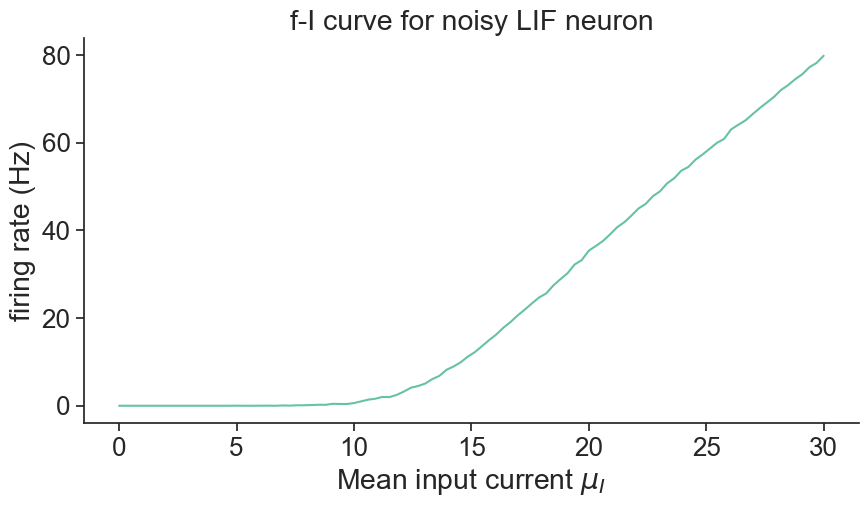

In [10]:
values = 100
sigma_I = 15
mu_Is = np.linspace(0, 30 ,values)
N_t = 100000
### Set the spiking threshold
# V_theta = ...

V, spikes, spikes_t = noisy_spiking_LIF(N_t, dt, V_init, E_m, V_theta, V_reset, tau, mu_Is, sigma_I)

rate = np.sum(spikes, axis = 0)/ ((N_t*dt)/1000)
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.plot(mu_Is, rate)
ax.set_ylabel('firing rate (Hz)')
ax.set_xlabel('Mean input current $\mu_I$')
ax.set_title('f-I curve for noisy LIF neuron')
plt.show()

Answers:
- **10mA and below, even with noise - no spikes**

- **15mA + $\sigma_I$ of 5, sometimes hits 20mA, which pushes the potential to -50 (threshold) and causes the spike**

- **20mA and above - stable spike intervals**

- **The effect of noise removes the hard threshold and smoothes out the f-I curve - firing rate gradually increases, as the $\sigma_I$ randomly hits sometimes**

## Exercise 2.2 - Interspike intervals

Now we will compute interspike interval distributions for different choices of parameters.
* Try varying both $\mu_I$ and $\sigma_I$.
* Make histograms of the interspike interval distribution for simulations with various parameter values (use `matplotlib.hist`).
* How does the shape of the distribution depend on the input parameters? (You can increase the number of simulation timesteps if you need to get a larger sample size).

In [38]:
values = 5
params = 2
combs = values*params
sigma_Is = np.zeros([combs]) + 15
mu_Is = np.zeros([combs]) + 15
sigma_Is[:values] = np.linspace(10,100,values)
mu_Is[values:] = np.linspace(0,20, values)

N_t = 50000

V, spikes, spikes_t = noisy_spiking_LIF(N_t*20, dt, V_init, E_m, V_theta, V_reset, tau, mu_Is, sigma_Is)

ISI_raw = compute_ISI(spikes_t)


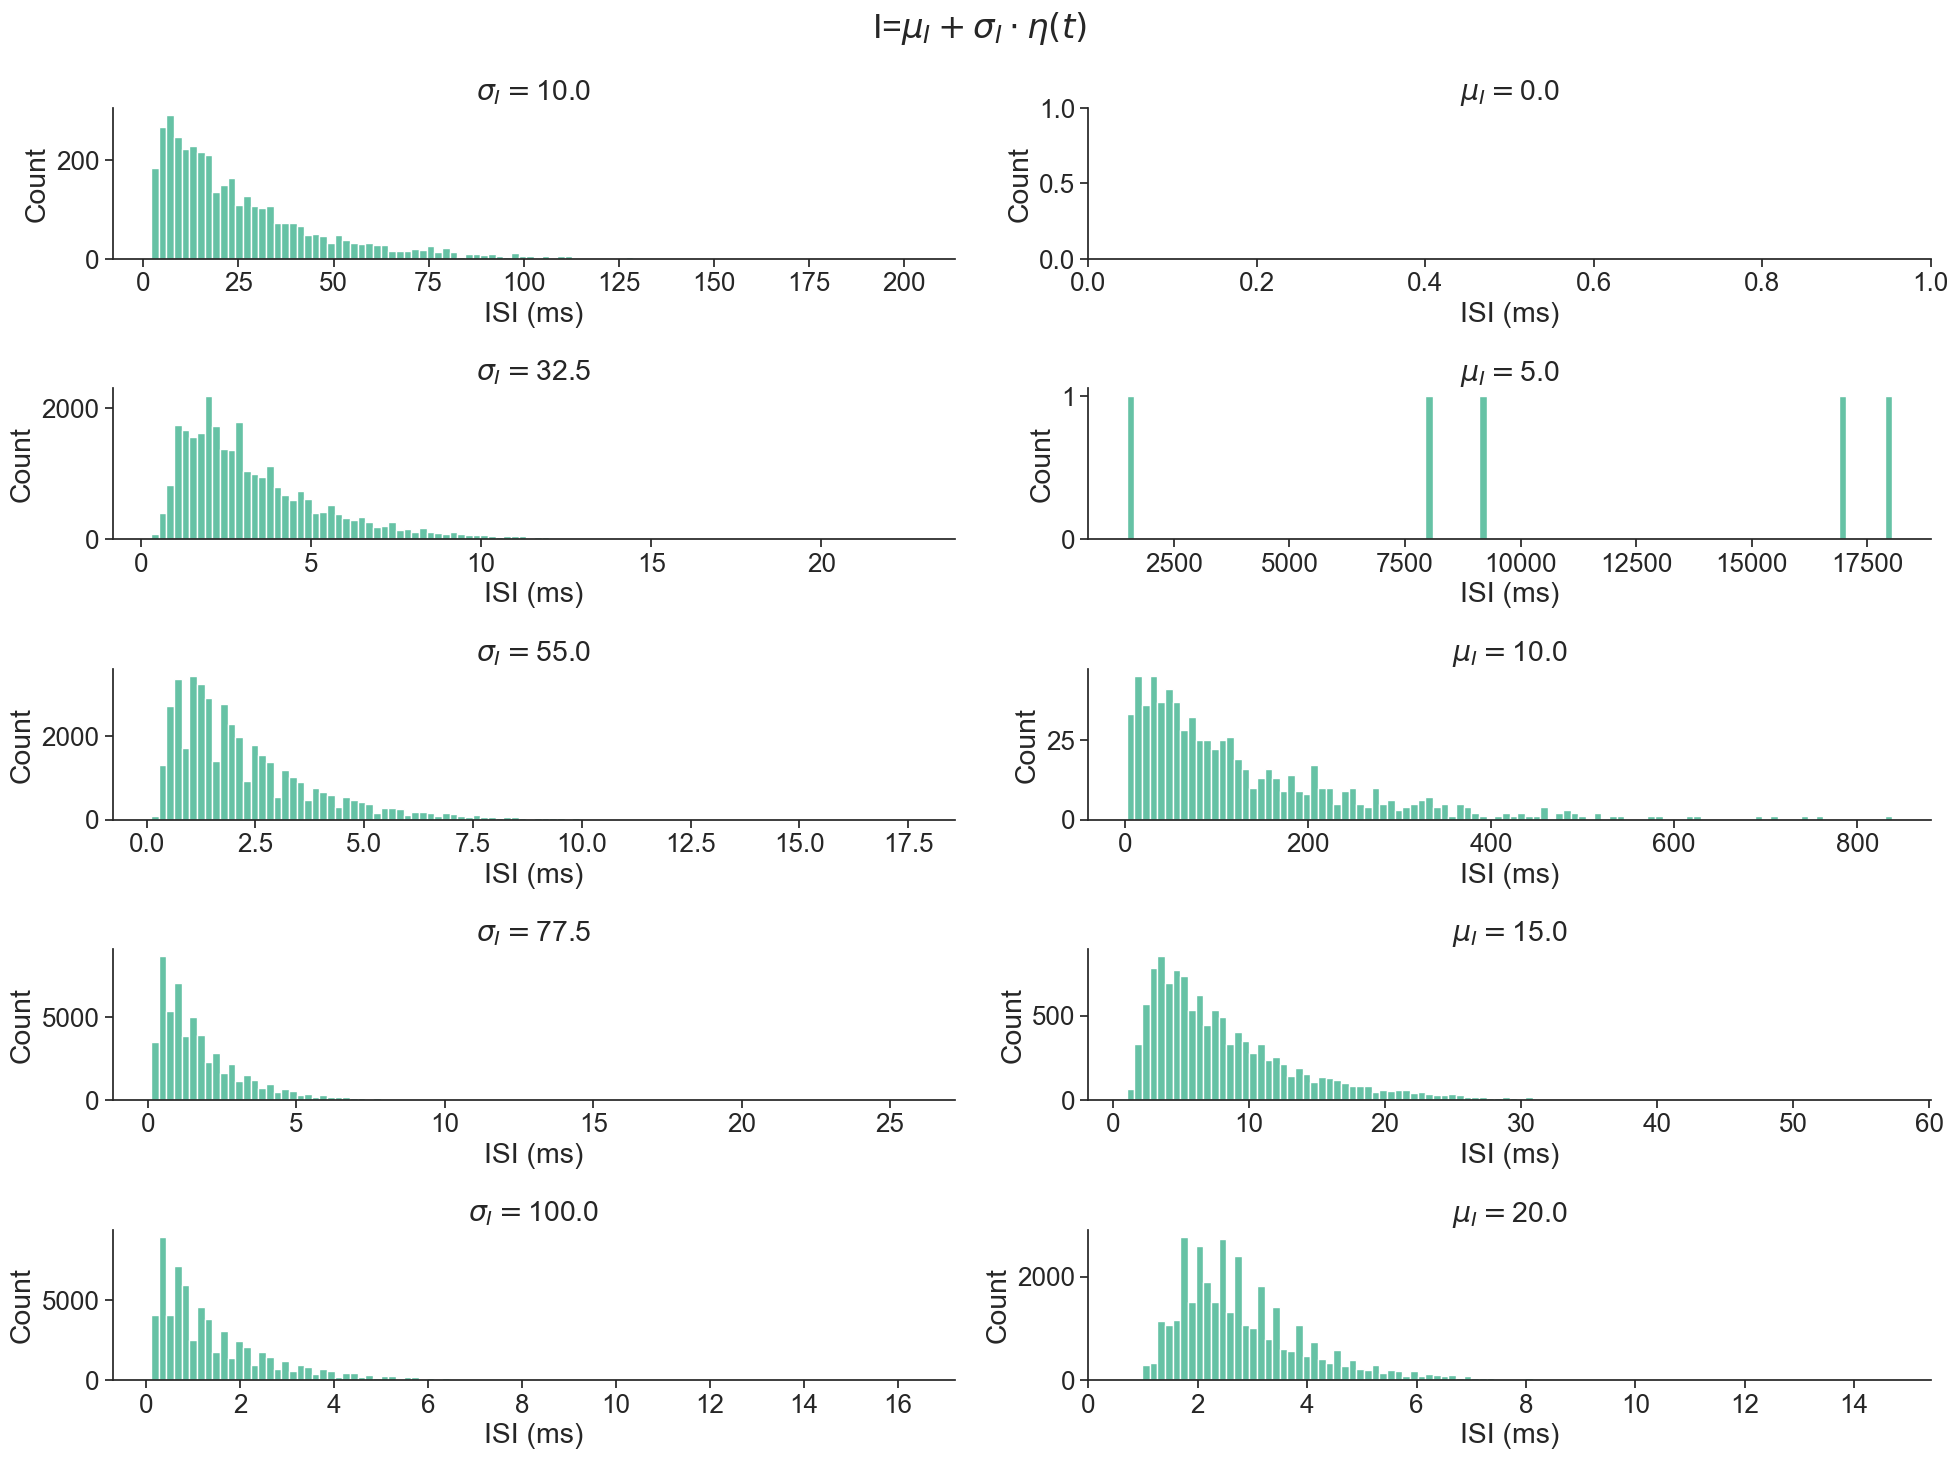

In [39]:
fig,ax = plt.subplots(values, params, figsize = (20,3*values))
fig.suptitle(r"I=$ \mu_I + \sigma_I \cdot \eta(t) $")
for i in range(values):
    if ISI_raw[i][0] is not None:
        ax[i,0].hist(ISI_raw[i], bins = 100)
    if ISI_raw[i+values][0] is not None:
        ax[i,1].hist(ISI_raw[i+values], bins = 100)
    ax[i,1].set_xlabel('ISI (ms)')
    ax[i,0].set_xlabel('ISI (ms)')
    ax[i,0].set_title('$\sigma_I=$'+str(sigma_Is[i]))
    ax[i,1].set_title('$\mu_I=$'+str(mu_Is[i+values]))
    ax[i,1].set_ylabel('Count')
    ax[i,0].set_ylabel('Count')


fig.tight_layout()
plt.show()

## Exercise 2.3 - The Fano factor

To quantify the variability of spiking activity, a useful statistic is the Fano factor:
$$F = \frac{\sigma_N^2}{\mu_N}$$
where $\sigma_N$ is the variance of the spike count and $\mu_N$ is its mean.

* Compute the Fano factor of the firing rate estimated over a window of size $50ms$.
* Given what you have seen in class, what stochastic process could be used to model the activity of the LIF neuron with noisy input when $\mu_I$ is low or $\sigma_I$ is high? Why?
* Is this consistent with what you've seen in the previous question? In particular, according to what distribution should the interspike intervals be distributed for such a stochastic process?

(Optional)

Another measure of variability is the Coefficient of Variation $CoV = \frac{\sigma_N}{\mu_N}$
* How does the Fano factor you just computed compare to the Coefficient of Variation?

NameError: name 'fano_factors' is not defined

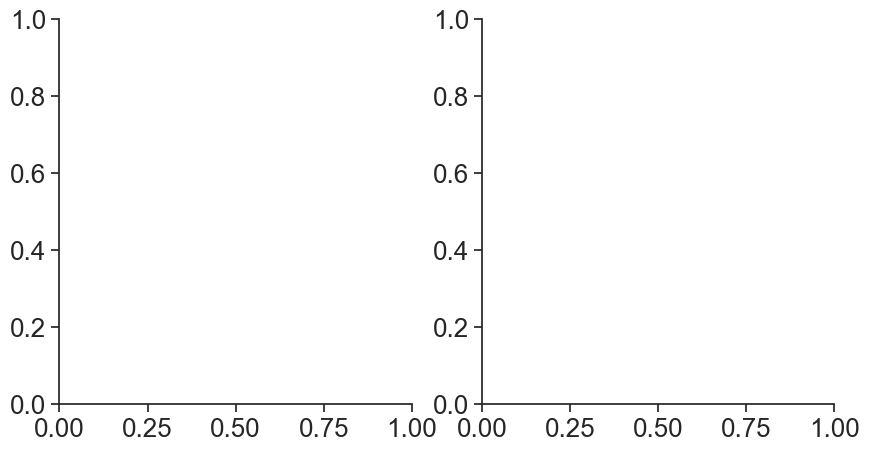

In [ ]:
window = 50
spike_counts = np.stack([np.histogram(spikes_t[i], np.arange(0, N_t*dt+dt, window))[0] for i in range(1, values*2)])
### Compute the Fano factor
fano_factors = 

fig, ax = plt.subplots(1, params, figsize = (5*params,5))

ax[0].plot(sigma_Is[1:values], fano_factors[:values-1])
ax[0].set_xlabel('$\sigma_I$'), ax[0].set_ylabel('Fano factor')

ax[1].plot(mu_Is[values:], fano_factors[values-1:])
ax[1].set_xlabel('$\mu_I$'), ax[0].set_ylabel('Fano factor')

fig.tight_layout()
plt.show()

# Conductance-Based Synaptic Input

We next replace the above current input with a conductance-based synaptic input (as discussed in lecture 5)

$$I_{ext} = −g_{syn}(t)(V − E_{syn})$$

We will use a model $g_{syn}(t) = w \sum_i e^{−(t−t^{(i)})/\tau_{syn}} \Theta(t − t^{(i)})$, with $t^{(i)}$ the presynaptic spike times.

## Exercise 3.1 - Inhibitory and excitatory synaptic input
Consider a scenario in which there is a single presynaptic spike at time $t^{(1)} = 100 $ ms. To model an inhibitory synaptic input, set $E_{syn} = −80 $ mV, $\tau_{syn} = 2 $ ms, $w = 5$ and simulate the membrane potential for a period of 1 s. To simulate an excitatory synaptic input, set $E_{syn} = 0 $ mV and repeat the simulation. How did the effects of the inhibitory and excitatory synaptic input differ? How might the reversal potential $E_{syn}$ and synaptic weight $w$ play different contributions in determining the influence of synaptic input on the membrane potential under more physiological conditions?

In [ ]:
def conductance_spiking_LIF(N_t, dt,  V_init, E_m, Theta, V_reset, tau, g_m, E_syn, w, tau_syn, t_spike):

    V = np.zeros([N_t+1])

    V[0] = V_init
    spikes = np.zeros(V.shape)
    g_syn = np.zeros(V.shape)
    spike_times = []

    for t in range(1,N_t+1):
        ### Compute the synaptic conductance at times t and the dynamics for V
        # g_syn[t] = ...
        # dV = ...
        V[t] = V[t-1] + 1/tau * dt * dV
        if V[t]>= Theta:
            V[t] = V_reset
            spike_times.append(t*dt)
            spikes[t] = 1.0

    return V, spikes, spike_times, g_syn

In [ ]:
#for Euler method
N_t = 1500
dt = 0.1

#for neuron
V_init =-70
E_m = -70
tau =10
g_m = 1
I_ext = 20
V_reset = -75
V_theta = -50

#synapse parameters
w = 2
tau_syn = 2
pre_spike = 100

# inhibitory input
E_syn = -80
V_inh, spikes_inh, t_spike_inh , g_inh = conductance_spiking_LIF(N_t, dt, V_init, E_m, V_theta, V_reset, tau, g_m, E_syn, w, tau_syn, pre_spike)

# excitatory input
E_syn = -0
V_exc, spikes_exc, t_spike_exc, g_exc = conductance_spiking_LIF(N_t, dt, V_init, E_m, V_theta, V_reset, tau, g_m, E_syn, w, tau_syn, pre_spike)


fig, ax = plt.subplots(1,1, figsize = (20,5))
ax.plot(np.arange(0,N_t*dt, dt), V_inh[1:], label = 'inhibitory')
ax.plot(np.arange(0,N_t*dt, dt), V_exc[1:], label = 'excitatory')
ax.ticklabel_format(useOffset=False, style = 'plain')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Membrane potential (mV)')
ax.set_title('Response to presynaptic spike ($w=$'+str(w)+')')
ax.legend(bbox_to_anchor=(1., 1.0), loc='upper left', fontsize = 20)
plt.show()

## Exercise 3.2 - Spike statistics

Now consider a barrage of presynaptic spikes with times generated from a Poisson process. Generate presynaptic spike times over a time window of duration $T = 1$ s with spike rate $r = 1000$ Hz (see lecture notes for how to simulate a Poisson process). Use these spike times to compute the synaptic conductance $g_{syn}(t)$ (try using $w = 0.1$, $E_{syn} = 0$ mV, $\tau_{syn} = 2$ ms). Simulate the membrane potential of the neuron driven by these input spikes (you can try with or without the spike-reset rule enabled). Try varying $r$, $w$, and $E_{syn}$. How does this influence the statistics of the subthreshold and/or spiking activity of the neuron?

In [ ]:
def poisson_ISI(time_steps, rate, dt, rng = 5):

    rand_gen = np.random.RandomState(seed = rng)
    ### Generate the external (input) spike train and save the spike times
    # sp_ext = ...
    # t_sp_ext = ...

    return t_sp_ext

In [ ]:
N_t = 10000
rate = 1000
pre_spikes = poisson_ISI(N_t, rate, dt)

tau_syn = 2
w = 0.15

# inhibitory input
E_syn = -80
V_inh, spikes_inh, t_spike_inh , g_inh= conductance_spiking_LIF(N_t, dt, V_init, E_m, V_theta, V_reset, tau, g_m, E_syn, w, tau_syn, pre_spikes)

# excitatory input
E_syn = -0
V_exc, spikes_exc, t_spike_exc, g_exc = conductance_spiking_LIF(N_t, dt, V_init, E_m, V_theta, V_reset, tau, g_m, E_syn, w, tau_syn, pre_spikes)


fig, ax = plt.subplots(1,1, figsize = (20,5))
ax.plot(np.arange(0,N_t*dt, dt), V_inh[1:], label = 'inhibitory')
ax.plot(np.arange(0,N_t*dt, dt), V_exc[1:], label = 'excitatory')
ax.ticklabel_format(useOffset=False, style = 'plain')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Membrane potential (mV)')
ax.legend(bbox_to_anchor=(1., 1.0), loc='upper left', fontsize = 20)
ax.set_title('Response to presynaptic spike ($w=$'+str(w)+', $r=1000$ Hz)')
plt.show()

Under what conditions does a Poisson distribution become approximately a Gaussian distribution? Based on this, under what conditions would you expect that the conductance-based Poisson input will become well-approximated by the current-based Gaussian noise input as considered in Section 2? Based on your knowledge of the brain, do you think that real neurons are in that regime? Why/why not?